In [1]:
# Display output of plots directly in Notebook
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import intake
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
catalog = intake.open_esm_datastore(
    'https://raw.githubusercontent.com/NCAR/cesm2-le-aws/main/intake-catalogs/aws-cesm2-le.json'
)
catalog

,unique
variable,53
long_name,51
component,4
experiment,2
forcing_variant,2
frequency,3
vertical_levels,3
spatial_domain,3
units,20
start_time,4


In [3]:
catalog.df.to_csv('namelist.csv')


In [4]:
catalog = intake.open_esm_datastore(
    'https://ncar-cesm-lens.s3-us-west-2.amazonaws.com/catalogs/aws-cesm1-le.json'
)
catalog

,unique
variable,78
long_name,75
component,5
experiment,4
frequency,6
vertical_levels,3
spatial_domain,5
units,25
start_time,12
end_time,13


In [5]:
catalog = intake.open_esm_datastore(
    'https://ncar-cesm-lens.s3-us-west-2.amazonaws.com/catalogs/aws-cesm1-le.json'
)
catalog

,unique
variable,78
long_name,75
component,5
experiment,4
frequency,6
vertical_levels,3
spatial_domain,5
units,25
start_time,12
end_time,13


In [6]:
catalog.df.to_csv('namelistCESM1.csv')


In [7]:
import xarray as xr
import numpy as np
import climdex.utils as cutils

In [8]:
import climdex.precipitation as pdex

In [9]:
indices = pdex.indices(time_dim='time')
   # compute total monthly precipitation;
   # your data should be daily or sub-daily time scale
#ptot = indices.PRECC
indices

In [10]:
#indices = pdex.indices(time_dim='time')
   # compute total monthly precipitation;
   # your data should be daily or sub-daily time scale
#ptot = indices.prcptot(data, period='1M')

In [11]:
catalog_subset = catalog.search(variable='TREFHT', frequency='daily')
catalog_subset

,unique
variable,1
long_name,1
component,1
experiment,4
frequency,1
vertical_levels,1
spatial_domain,1
units,1
start_time,4
end_time,4


In [12]:
catalog_subset.df


,variable,long_name,component,experiment,frequency,vertical_levels,spatial_domain,units,start_time,end_time,path
0,TREFHT,reference height temperature,atm,20C,daily,1.0,global,K,1920-01-01 12:00:00,2005-12-31 12:00:00,s3://ncar-cesm-lens/atm/daily/cesmLE-20C-TREFH...
1,TREFHT,reference height temperature,atm,CTRL,daily,1.0,global,K,0402-01-01 12:00:00,2200-12-31 12:00:00,s3://ncar-cesm-lens/atm/daily/cesmLE-CTRL-TREF...
2,TREFHT,reference height temperature,atm,HIST,daily,1.0,global,K,1850-01-01 12:00:00,1919-12-31 12:00:00,s3://ncar-cesm-lens/atm/daily/cesmLE-HIST-TREF...
3,TREFHT,reference height temperature,atm,RCP85,daily,1.0,global,K,2006-01-01 12:00:00,2100-12-31 12:00:00,s3://ncar-cesm-lens/atm/daily/cesmLE-RCP85-TRE...


In [13]:
dsets = catalog_subset.to_dataset_dict(storage_options={'anon':True})



--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.frequency'


In [14]:
#indices = pdex.indices(time_dim='time')
   # compute total monthly precipitation;
   # your data should be daily or sub-daily time scale
#ptot = indices.TREFHT(data, period='1M')

In [15]:
dsets

{'atm.HIST.daily': <xarray.Dataset> Size: 6GB
 Dimensions:    (time: 25550, lat: 192, lon: 288, nbnd: 2)
 Coordinates:
   * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
   * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
     member_id  int64 8B ...
   * time       (time) object 204kB 1850-01-01 12:00:00 ... 1919-12-31 12:00:00
     time_bnds  (time, nbnd) object 409kB dask.array<chunksize=(12775, 2), meta=np.ndarray>
 Dimensions without coordinates: nbnd
 Data variables:
     TREFHT     (time, lat, lon) float32 6GB dask.array<chunksize=(576, 192, 288), meta=np.ndarray>
 Attributes: (12/25)
     Conventions:                       CF-1.0
     NCO:                               4.4.2
     Version:                           $Name$
     important_note:                    This data is part of the project 'Blin...
     initial_file:                      b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i....
     logname:                         

In [16]:
dsets.keys()


dict_keys(['atm.HIST.daily', 'atm.RCP85.daily', 'atm.20C.daily', 'atm.CTRL.daily'])

In [17]:
historical = dsets['atm.HIST.daily']


In [18]:
historical

<xarray.Dataset> Size: 6GB
Dimensions:    (time: 25550, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    member_id  int64 8B ...
  * time       (time) object 204kB 1850-01-01 12:00:00 ... 1919-12-31 12:00:00
    time_bnds  (time, nbnd) object 409kB dask.array<chunksize=(12775, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    TREFHT     (time, lat, lon) float32 6GB dask.array<chunksize=(576, 192, 288), meta=np.ndarray>
Attributes: (12/25)
    Conventions:                       CF-1.0
    NCO:                               4.4.2
    Version:                           $Name$
    important_note:                    This data is part of the project 'Blin...
    initial_file:                      b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i....
    logname:                           mudryk
    ...                                ...
    intake_esm_attrs:units:            K
    intake_esm_attrs:start_time:       1850-01-01 12:00:00
    intake_esm_attrs:end_time:         1919-12-31 12:00:00
    intake_esm_attrs:path:             s3://ncar-cesm-lens/atm/daily/cesmLE-H...
    intake_esm_attrs:_data_format_:    zarr
    intake_esm_dataset_key:            atm.HIST.daily

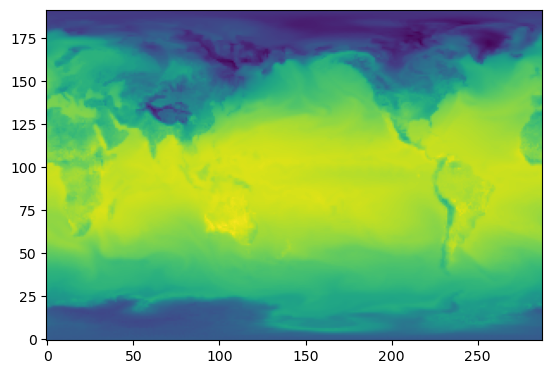

In [19]:
import matplotlib.pyplot as plt
plt.imshow(historical['TREFHT'].data[0], origin='lower')

In [20]:
#plt.colorbar() # for the colorbar

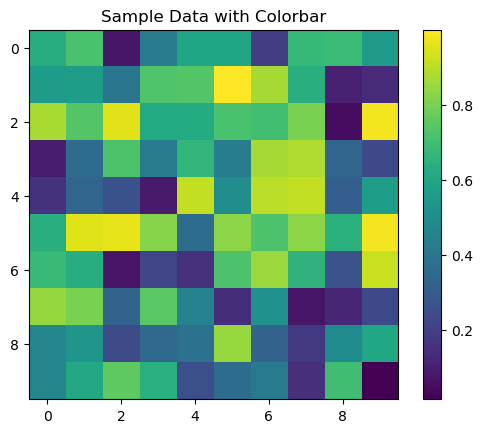

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Create sample data
data = np.random.rand(10, 10)

# Create a plot with imshow
plt.imshow(data, cmap='viridis')
plt.colorbar() # Add a colorbar to the plot
plt.title("Sample Data with Colorbar")
plt.show()
